In [130]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
from cmath import pi


def velVor(posVor,posAna,tau):
    r=np.sqrt( ( posVor[0] - posAna[0])**2 + ( posVor[1]-posAna[1] )**2 ) 
    if(r==0):
        return np.array([0,0])
    sinThetamod = np.abs(posAna[1]-posVor[1])/r
    cosThetamod = np.abs(posVor[0]-posAna[0])/r
    rx = posAna[0]-posVor[0]
    ry = posAna[1]-posVor[1]
    if(rx>0):
        if(ry>0):
            dirUnit = np.array([-1,1])
        else:
            dirUnit = np.array([1,1])
    else:
        if(ry>0):
            dirUnit = np.array([-1,-1])
        else:
            dirUnit = np.array([1,-1])
    Vnet = tau/(2*pi*r)
    v = [0,0]
    v[0] = Vnet*sinThetamod
    v[1] = Vnet*cosThetamod
    v = v*dirUnit
    return v

In [62]:
def generateVorCor(n,thetaRad,l):
    posVor = np.array([ [0,0] ])
    for i in range (0,n-1):
        posVori = posVor[i] + np.array( [ ( l / ( n - 1 ) ) * np.cos( thetaRad ) , ( l / ( n - 1 ) ) * np.sin( thetaRad )] )
        posVor = np.append(posVor,posVori)
        posVor = posVor.reshape(i+2,2)     
    return posVor

In [173]:
def netV(vorposs,posAna):
    v=0
    for i in range (0,10):
        v = v + velVor(vorposs[i],posAna,0.015*2*pi) 
    v = v +np.array([1,0])
    return v

In [181]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)

In [182]:
posVors = generateVorCor(10,-10*pi/180,1)


In [183]:
xy = np.array([xx,yy])

In [184]:
velocityAllVor = []

In [185]:
for i in range(0,10):
    for j in range(0,101):
        for k in range(0,101):
            posana = np.array( [xy[0][j][k], xy[1][j][k]] )
            velocityAllVor.append(velVor(posVors[i],posana,0.015))



In [186]:
velocityAllVor = np.array(velocityAllVor)

In [187]:
velocityAllVor = velocityAllVor.reshape(10,10201,2)

In [188]:
for i in range (0,9):
    velocityAllVor[i+1] = velocityAllVor[i+1] + velocityAllVor[i]

In [189]:
ones = []
for i in range(0,10201):
    ones.append([1,0])

In [190]:
ones=np.array(ones)

In [191]:
velocityAllVor=velocityAllVor+ones

In [202]:
velocityAllVor[9]

array([[ 1.0021633 , -0.00240949],
       [ 1.00220744, -0.00241377],
       [ 1.00225255, -0.00241729],
       ...,
       [ 0.9972653 ,  0.00230645],
       [ 0.99731766,  0.00231491],
       [ 0.99736919,  0.00232205]])

In [148]:
def pltstreamline(inipt,posVors):
    x = np.linspace(-5,5,101)
    y = np.zeros(101)
    y[0]=inipt
    for i in range(0,100):
        y[i+1] = y[i] + 0.1 * netV( posVors, [ x[i] , y[i] ] )[1]/netV( posVors, [ x[i] , y[i] ] )[0]
    plt.plot(x,y)

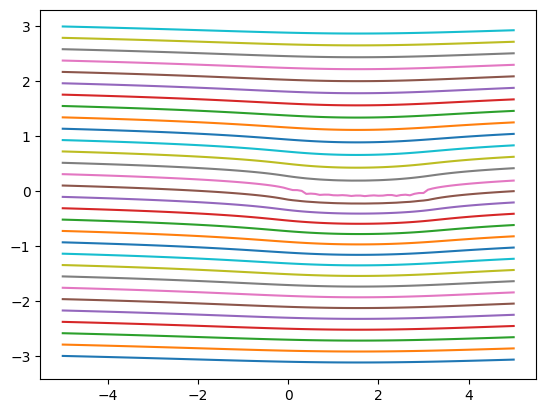

In [180]:
y1 = np.linspace(-3,3,30)
for i in range(0,30):
    pltstreamline(y1[i],posVors)
plt.show()

In [151]:
for i in range(0,101):
    print(y[i])

-5.0
-5.000240429033041
-5.000481263420006
-5.000722427653772
-5.0009638411650394
-5.001205418092866
-5.0014470670525215
-5.001688690901768
-5.0019301865068355
-5.002171444509546
-5.002412349097266
-5.002652777777572
-5.002892601159744
-5.003131682745482
-5.003369878731447
-5.003607037826546
-5.003843001087121
-5.004077601773482
-5.004310665231504
-5.00454200880326
-5.004771441770916
-5.0049987653383265
-5.005223772654983
-5.005446248887095
-5.0056659713407115
-5.005882709641799
-5.006096225978196
-5.006306275408201
-5.006512606240376
-5.006714960488785
-5.006913074407456
-5.007106679107282
-5.007295501257849
-5.007479263875836
-5.007657687200619
-5.007830489656589
-5.0079973889004
-5.008158102949981
-5.008312351390646
-5.008459856652046
-5.008600345348088
-5.008733549670273
-5.008859208823316
-5.008977070490315
-5.009086892313307
-5.009188443373769
-5.009281505656536
-5.009365875479806
-5.0094413648733855
-5.009507802887148
-5.009565036811873
-5.009612933295206
-5.00965137933645
-5.00